# Code for CUQIpy paper 1, section 3

## Section 3.6:

In [1]:
import cuqi
import numpy as np
import matplotlib.pyplot as plt

print(f"cuqipy version: {cuqi.__version__}")

# Options
s = 0.01  # Noise standard deviation
ns = 1000 # Number of samples
s_to_plot = 500 # Posterior sample to plot
ylims_post = (-0.25, 1.25) # y limits for posterior plots
seed = 1 # Random seed

cuqipy version: 0.8.0.post0.dev13


In [2]:
plt.rcParams.update({'font.size': 12})

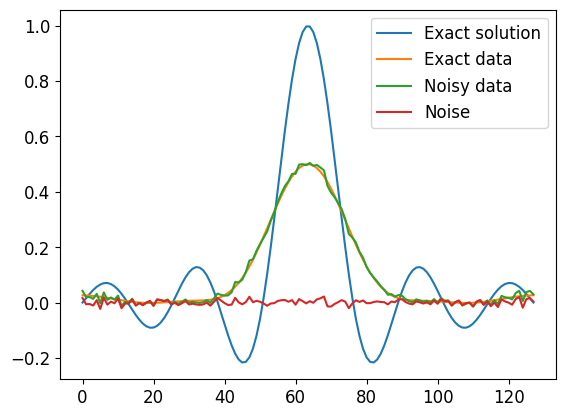

In [3]:
# Set up case with sinc phantom first to get axis limits for plots

np.random.seed(seed)
A, y_data, info = cuqi.testproblem.Deconvolution1D(
    phantom='sinc',
    noise_std=s).get_components()

x_true = info.exactSolution
y_true = info.exactData

x_true.plot(label="Exact solution")
y_true.plot(label="Exact data")
y_data.plot(label="Noisy data")
(y_data-y_true).plot(label="Noise")
ax = plt.gca()
ylims = ax.get_ylim()
plt.legend()

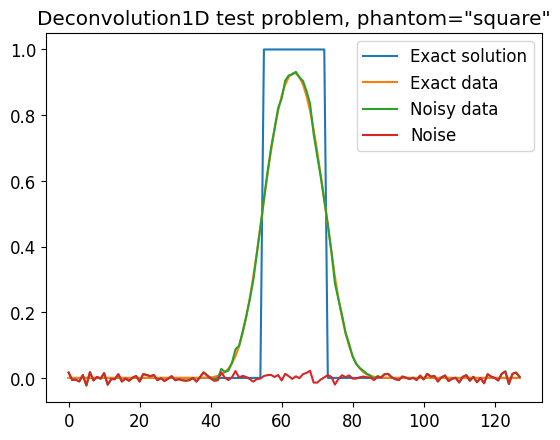

In [4]:
# Deconvolution with square phantom setup
np.random.seed(seed)

TP = cuqi.testproblem.Deconvolution1D(phantom='square', 
                                      noise_std=s,
                                      PSF_param=5,
)

A = TP.model
y_data = TP.data
x_true = TP.exactSolution
y_true = TP.exactData

x_true.plot(label="Exact solution")
y_true.plot(label="Exact data")
y_data.plot(label="Noisy data")
(y_data-y_true).plot(label="Noise")
ax = plt.gca()
ylims = ax.get_ylim()
plt.title("Deconvolution1D test problem, phantom=\"square\"")
plt.legend()

In [5]:
# Demonstrate forward and adjoint
yx = A @ x_true
xx = A.T(yx)

In [6]:
print(x_true.geometry)

Continuous1D(128,)



 MAP estimate:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is experimental. !!!
!!!    Always validate the computed results.    !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using direct MAP of Gaussian posterior. Only works for small-scale problems with dim<=2000.

 Posterior samples:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is experimental. !!!
!!!    Always validate the computed results.     !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using direct sampling of Gaussian posterior. Only works for small-scale problems with dim<=2000.
No burn-in needed for direct sampling.
 Sample 1000 / 1000
Elapsed time: 0.20494747161865234


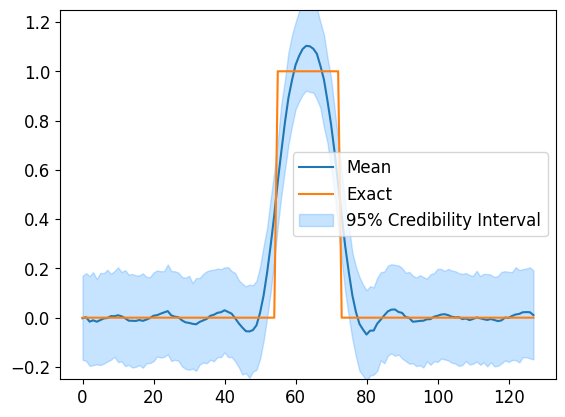

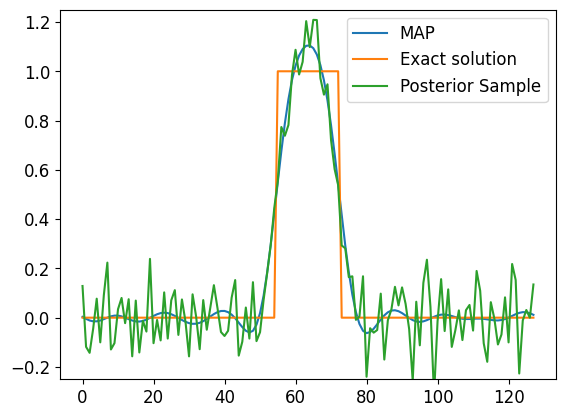

In [7]:
# Gaussian prior
TP.prior = cuqi.distribution.Gaussian(np.zeros(A.domain_dim), 0.01)

# MAP estimate
print("\n MAP estimate:")
x_MAP = TP.MAP()

# Posterior samples
print("\n Posterior samples:")
samples = TP.sample_posterior(ns)

# Plot posterior samples, MAP estimate and a single sample along with exact solution
samples.plot_ci(exact=x_true)
plt.ylim(ylims_post)
plt.show()


x_MAP.plot()
x_true.plot()
samples.plot(s_to_plot)
plt.ylim(ylims_post)
plt.legend(["MAP", "Exact solution", "Posterior Sample"])


 MAP estimate:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is experimental. !!!
!!!    Always validate the computed results.    !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Optimizing with exact gradients
Using scipy.optimize.minimize on negative log of Posterior
x0: ones vector

 Posterior samples:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is experimental. !!!
!!!    Always validate the computed results.     !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using LinearRTO sampler.
burn-in: 20%
Sample 1200 / 1200
Elapsed time: 4.802284479141235


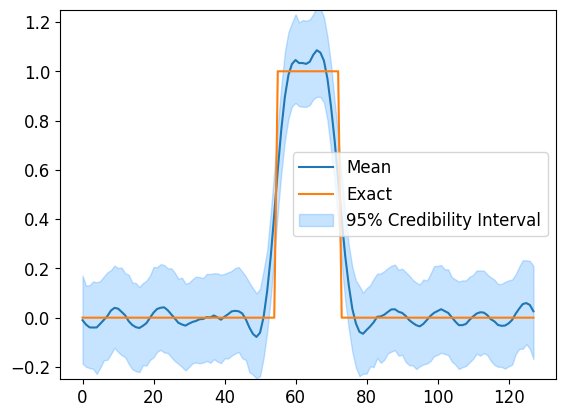

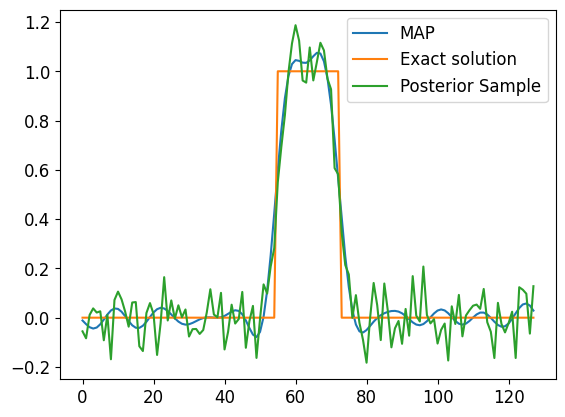

In [8]:
TP.prior = cuqi.distribution.GMRF(np.zeros(A.domain_dim), prec=50)

# MAP estimate
print("\n MAP estimate:")
x_MAP = TP.MAP()

# Posterior samples
print("\n Posterior samples:")
samples = TP.sample_posterior(ns)

# Plot posterior samples, MAP estimate and a single sample along with exact solution
samples.plot_ci(exact=x_true)
plt.ylim(ylims_post)
plt.show()


x_MAP.plot()
x_true.plot()
samples.plot(s_to_plot)
plt.ylim(ylims_post)
plt.legend(["MAP", "Exact solution", "Posterior Sample"])


 MAP estimate:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is experimental. !!!
!!!    Always validate the computed results.    !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Optimizing with approximate gradients.
Using scipy.optimize.minimize on negative log of Posterior
x0: ones vector

 Posterior samples:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is experimental. !!!
!!!    Always validate the computed results.     !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using UGLA sampler
burn-in: 20%
Sample 1200 / 1200
Elapsed time: 21.910574674606323


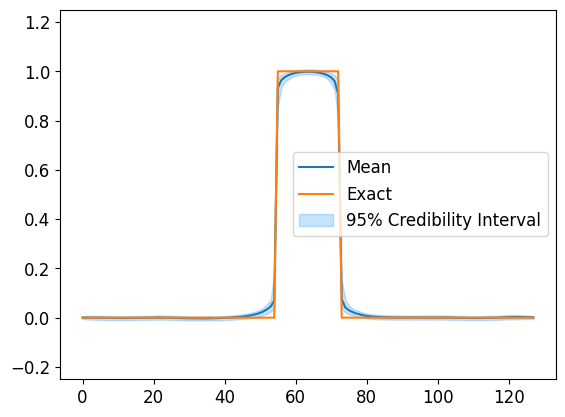

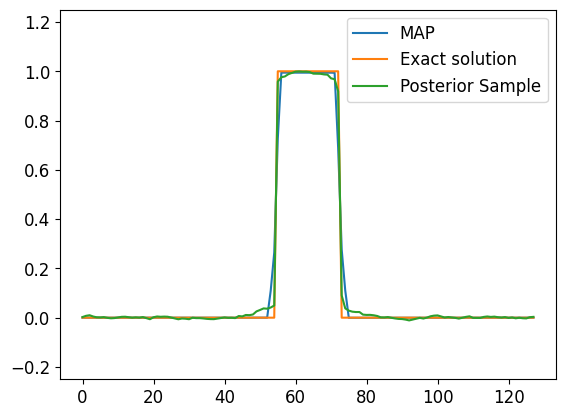

In [9]:
# LMRF prior
TP.prior = cuqi.distribution.LMRF(np.zeros(A.domain_dim), 0.002)

# MAP estimate
print("\n MAP estimate:")
x_MAP = TP.MAP()

# Posterior samples
print("\n Posterior samples:")
samples = TP.sample_posterior(ns)

# Plot posterior samples, MAP estimate and a single sample along with exact solution
samples.plot_ci(exact=x_true)
plt.ylim(ylims_post)
plt.show()


x_MAP.plot()
x_true.plot()
samples.plot(s_to_plot)
plt.ylim(ylims_post)
plt.legend(["MAP", "Exact solution", "Posterior Sample"])


 MAP estimate:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic solver selection is experimental. !!!
!!!    Always validate the computed results.    !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Optimizing with exact gradients
Using scipy.optimize.L_BFGS_B on negative log of Posterior
x0: ones vector

 Posterior samples:
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is experimental. !!!
!!!    Always validate the computed results.     !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using No-U-Turn (NUTS) sampler
burn-in: 20%
Sample 1200 / 1200
Elapsed time: 60.93191695213318


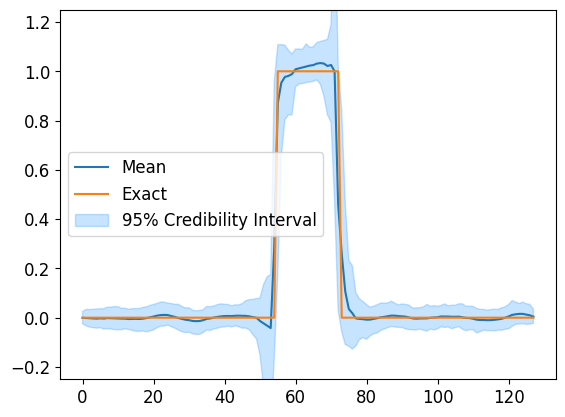

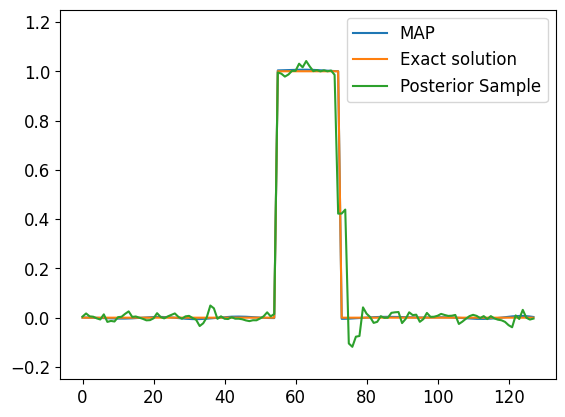

In [10]:
# CMRF prior
TP.prior = cuqi.distribution.CMRF(np.zeros(A.domain_dim), 0.01)

# MAP estimate
print("\n MAP estimate:")
x_MAP = TP.MAP()

# Posterior samples
print("\n Posterior samples:")
samples = TP.sample_posterior(ns)

# Plot posterior samples, MAP estimate and a single sample along with exact solution
samples.plot_ci(exact=x_true)
plt.ylim(ylims_post)
plt.show()


x_MAP.plot()
x_true.plot()
samples.plot(s_to_plot)
plt.ylim(ylims_post)
plt.legend(["MAP", "Exact solution", "Posterior Sample"])
